<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Phân tích dữ liệu điểm thi THPTQG 2022 và 2023<Title>
</div>

### Import thư viện

In [1]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.subplots as sp

warnings.filterwarnings("ignore")

### Đường dẫn

In [63]:
path_raw_2022='./raw/2022.csv'
path_raw_2023='./raw/2023.csv'
path_processed='./processed'
path_img='./img'

### Đọc dữ liệu

In [109]:
df_2022=pd.read_csv(path_raw_2022)
print(df_2022.shape)
print(df_2022.dtypes)
df_2022.head()

(995441, 10)
sbd            int64
toan         float64
ngu_van      float64
ngoai_ngu    float64
vat_li       float64
hoa_hoc      float64
sinh_hoc     float64
lich_su      float64
dia_li       float64
gdcd         float64
dtype: object


,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25


In [110]:
df_2023=pd.read_csv(path_raw_2023)
print(df_2023.shape)
print(df_2023.dtypes)
df_2023.head()

(1022060, 11)
sbd               int64
toan            float64
ngu_van         float64
ngoai_ngu       float64
vat_li          float64
hoa_hoc         float64
sinh_hoc        float64
lich_su         float64
dia_li          float64
gdcd            float64
ma_ngoai_ngu     object
dtype: object


,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,8.50,9.2,NaN,NaN,NaN,6.75,6.00,9.00,N1
1,1000002,7.2,8.50,9.2,NaN,NaN,NaN,8.75,6.50,8.50,N1
2,1000003,NaN,6.50,NaN,NaN,NaN,NaN,9.25,7.50,NaN,NaN
3,1000004,7.8,8.25,7.8,NaN,NaN,NaN,4.50,6.25,8.25,N1
4,1000005,7.2,8.00,7.8,NaN,NaN,NaN,4.75,6.75,8.25,N1


Xóa `ma_ngoai_ngu`

In [111]:
df_2023.drop(columns=['ma_ngoai_ngu'], inplace=True)
df_2023.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,1000001,8.4,8.50,9.2,NaN,NaN,NaN,6.75,6.00,9.00
1,1000002,7.2,8.50,9.2,NaN,NaN,NaN,8.75,6.50,8.50
2,1000003,NaN,6.50,NaN,NaN,NaN,NaN,9.25,7.50,NaN
3,1000004,7.8,8.25,7.8,NaN,NaN,NaN,4.50,6.25,8.25
4,1000005,7.2,8.00,7.8,NaN,NaN,NaN,4.75,6.75,8.25


### Thống kê cơ bản về dữ liệu

In [46]:
stats_2022 = df_2022.describe()
stats_2022

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
count,9.954410e+05,982726.000000,981407.000000,870609.000000,325523.000000,327367.000000,322198.000000,659662.000000,657421.000000,554343.000000
mean,2.759692e+07,6.466254,6.507746,5.157686,6.723779,6.703898,5.019109,6.343930,6.677929,8.033266
std,1.917092e+07,1.675435,1.379602,1.949547,1.441925,1.600393,1.448270,1.612879,1.215013,1.067272
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000217e+07,5.400000,5.580000,3.600000,5.750000,5.500000,4.000000,5.250000,5.750000,7.500000
50%,2.801886e+07,6.800000,6.500000,4.800000,7.000000,7.000000,4.750000,6.500000,6.750000,8.250000
75%,4.400582e+07,7.800000,7.500000,6.600000,7.750000,8.000000,6.000000,7.500000,7.500000,8.750000
max,6.400659e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [47]:
stats_2023=df_2023.describe()
stats_2023

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
count,1.022060e+06,1.003373e+06,1.008239e+06,880997.000000,327189.000000,328118.000000,324625.000000,683447.000000,682134.000000,565452.000000
mean,2.753863e+07,6.250557e+00,6.858194e+00,5.462410,6.573900,6.744646,6.394933,6.025629,6.147523,8.285805
std,1.915578e+07,1.633336e+00,1.326471e+00,1.966353,1.486819,1.428468,1.206772,1.552931,1.168732,1.137638
min,1.000001e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000129e+07,5.200000e+00,6.000000e+00,4.000000,5.500000,5.750000,5.500000,5.000000,5.500000,7.750000
50%,2.801558e+07,6.600000e+00,7.000000e+00,5.200000,6.750000,7.000000,6.500000,6.000000,6.250000,8.500000
75%,4.400621e+07,7.600000e+00,7.750000e+00,7.000000,7.750000,7.750000,7.250000,7.250000,7.000000,9.250000
max,6.400694e+07,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [50]:
# Chuyển đổi dữ liệu sang định dạng long format
stats_2022_long = stats_2022.melt(var_name='Subject', value_name='Value', ignore_index=False).reset_index()
stats_2023_long = stats_2023.melt(var_name='Subject', value_name='Value', ignore_index=False).reset_index()

# Thêm cột Year để chỉ ra năm tương ứng
stats_2022_long['Year'] = 2022
stats_2023_long['Year'] = 2023

# Gộp dữ liệu của hai năm
stats_combined_long = pd.concat([stats_2022_long, stats_2023_long], axis=0)

# Sắp xếp lại các cột
stats_combined_long = stats_combined_long[['Year', 'index', 'Subject', 'Value']]

# Đổi tên cột cho dễ hiểu
stats_combined_long.columns = ['Year', 'Statistic', 'Subject', 'Value']

# Lưu kết quả vào file CSV
stats_combined_long.to_csv(path_processed + '/statistics_summary_long_format.csv', index=False)

In [62]:
# Danh sách các môn học
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']

# Tạo map cho tên môn học tiếng Việt có dấu
subject_map = {
    'toan': 'Toán',
    'ngu_van': 'Ngữ Văn',
    'ngoai_ngu': 'Ngoại Ngữ',
    'vat_li': 'Vật Lí',
    'hoa_hoc': 'Hóa Học',
    'sinh_hoc': 'Sinh Học',
    'lich_su': 'Lịch Sử',
    'dia_li': 'Địa Lí',
    'gdcd': 'GDCD'
}

### Phổ điểm các môn

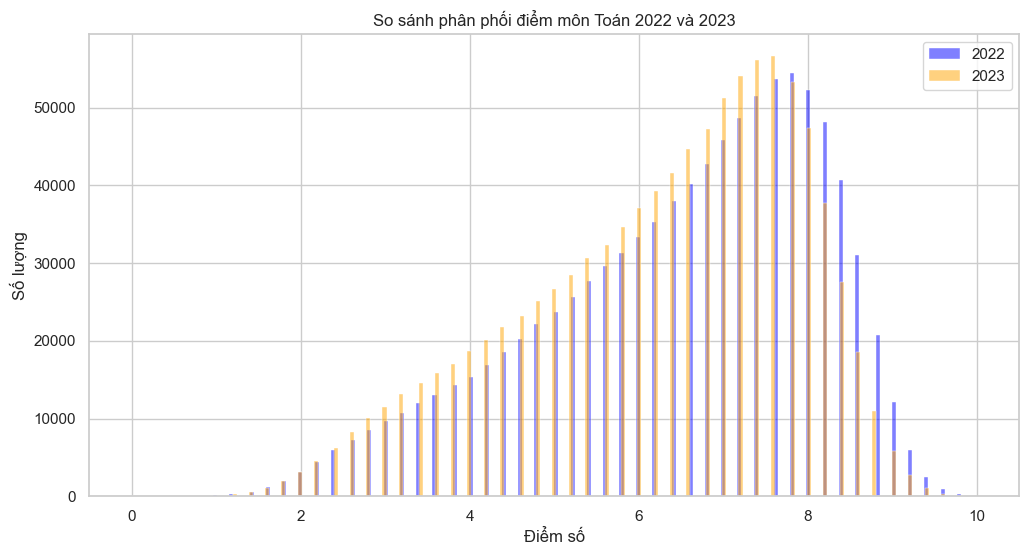

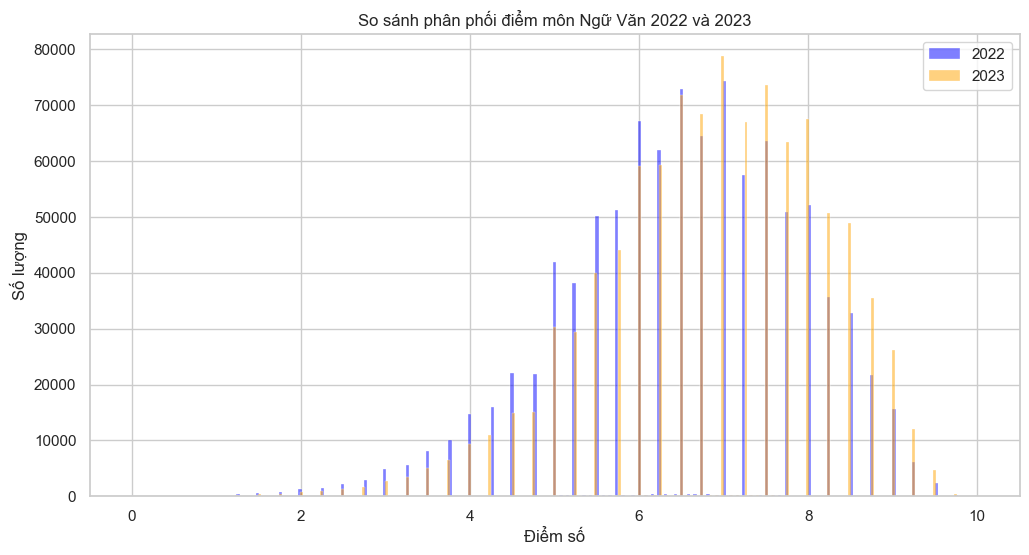

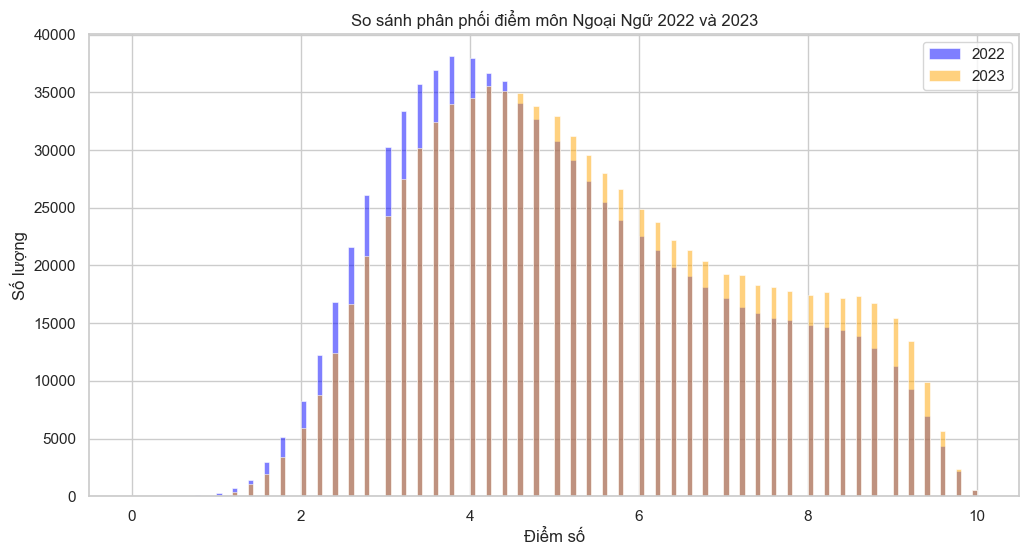

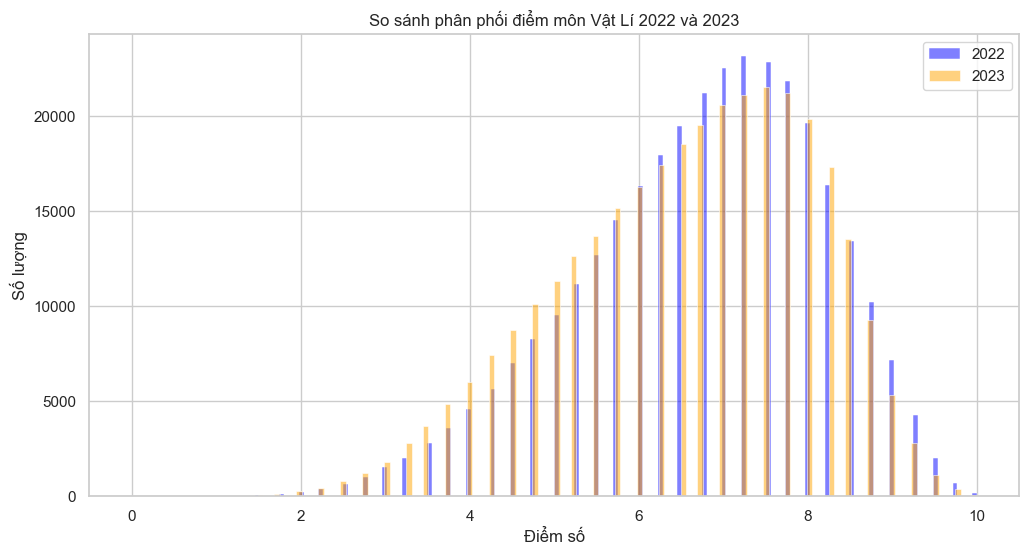

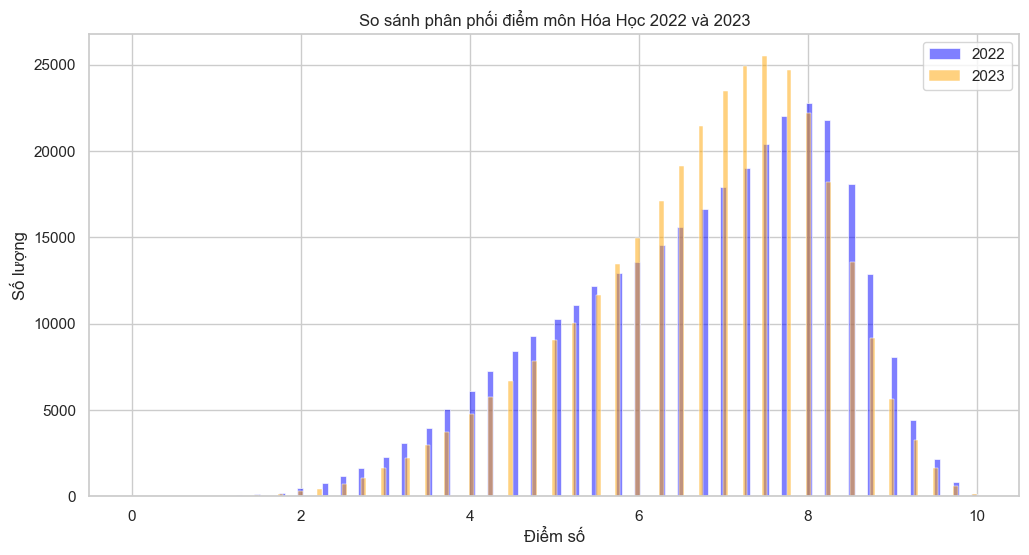

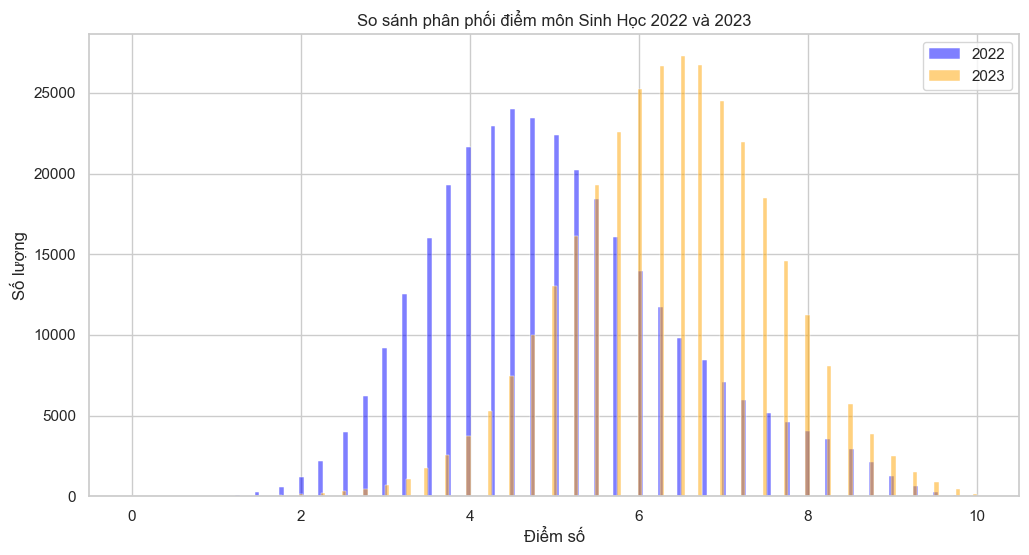

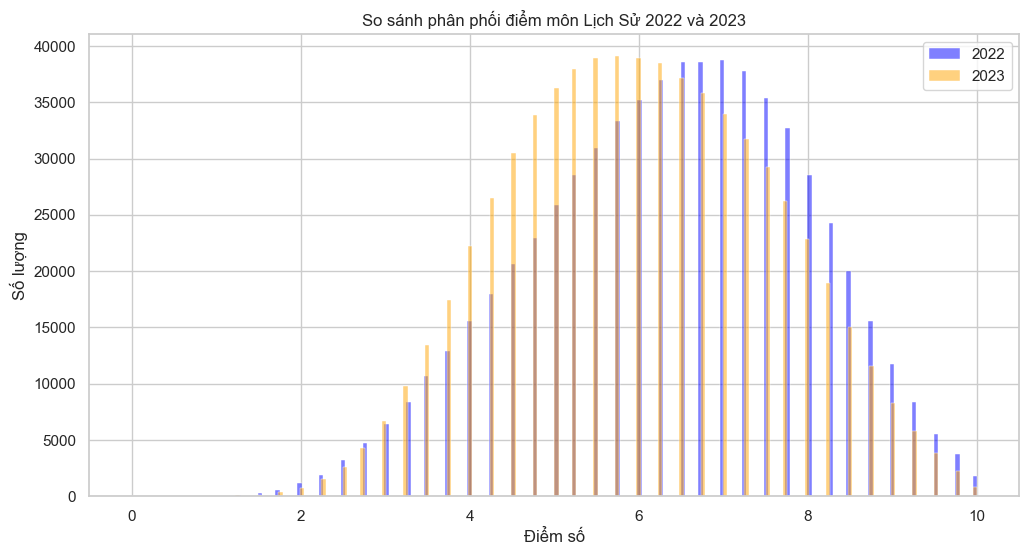

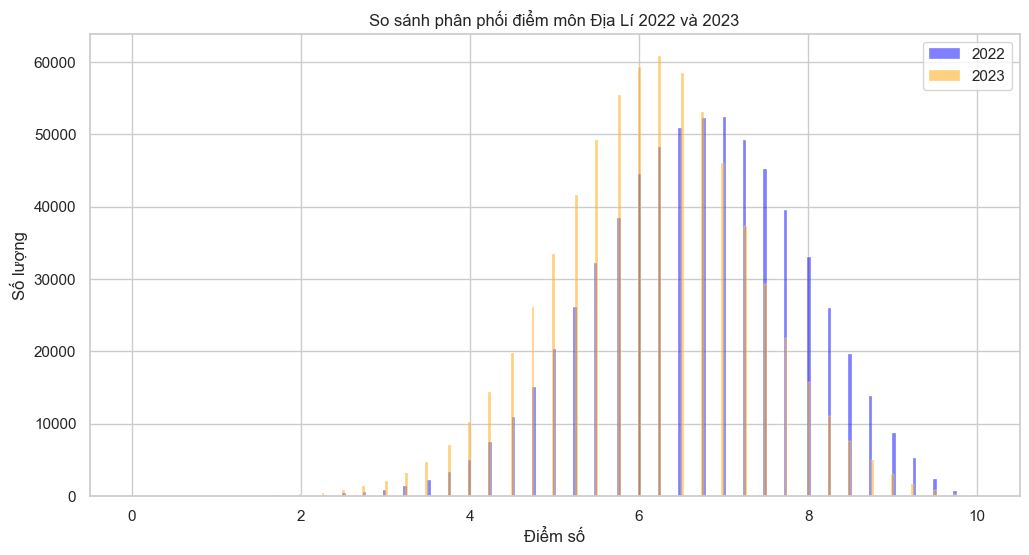

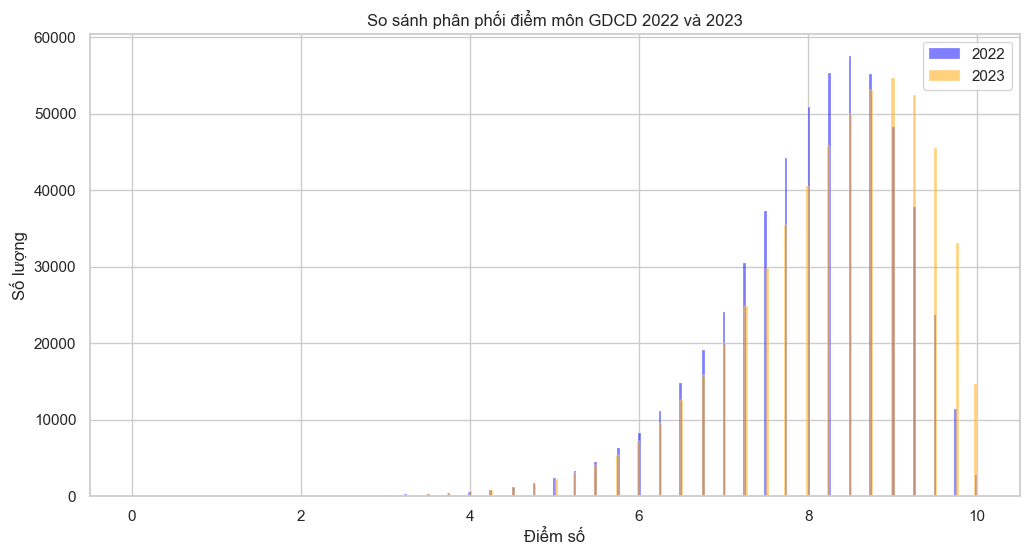

In [133]:
# Vẽ biểu đồ phân phối điểm cho từng môn với màu sắc và độ trong suốt khác nhau
sns.set_theme(style="whitegrid")

for subject in subjects:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_2022[subject], color='blue', label='2022', stat="count", alpha=0.5)
    sns.histplot(df_2023[subject], color='orange', label='2023', stat="count", alpha=0.5)
    plt.title(f'So sánh phân phối điểm môn {subject_map[subject]} 2022 và 2023')
    plt.xlabel('Điểm số')
    plt.ylabel('Số lượng')
    plt.legend()
    plt.savefig(f'{path_img}/distribution_{subject}.png')
    plt.show()

In [64]:
# Hàm để tính tần suất xuất hiện của từng điểm số
def calculate_frequency(df, year):
    freq_df_list = []
    subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
    for subject in subjects:
        freq = df[subject].value_counts().reset_index()
        freq.columns = ['Score', 'Frequency']
        freq['Year'] = year
        freq['Subject'] = subject
        freq_df_list.append(freq)
    return pd.concat(freq_df_list)

# Tính tần suất xuất hiện của từng điểm số cho mỗi môn thi
freq_2022 = calculate_frequency(df_2022, 2022)
freq_2023 = calculate_frequency(df_2023, 2023)

# Gộp dữ liệu của hai năm
freq_combined = pd.concat([freq_2022, freq_2023])

# Sắp xếp lại các cột
freq_combined = freq_combined[['Year', 'Subject', 'Score', 'Frequency']]

# Lưu kết quả vào file CSV
freq_combined.to_csv(path_processed + '/score_frequencies.csv', index=False)


### Phổ điểm các tổ hợp môn

In [65]:
# Định nghĩa các tổ hợp môn thi
combinations = {
    'A00': ['toan', 'vat_li', 'hoa_hoc'],
    'A01': ['toan', 'vat_li', 'ngoai_ngu'],
    'B00': ['toan', 'hoa_hoc', 'sinh_hoc'],
    'C00': ['ngu_van', 'lich_su', 'dia_li'],
    'D01': ['toan', 'ngu_van', 'ngoai_ngu']
}

In [92]:
# Hàm để tính tổng điểm cho từng tổ hợp môn
def calculate_combination_scores(df, combinations):
    for combo, subjects in combinations.items():
        # Loại bỏ các hàng có NaN trong các môn trong tổ hợp
        mask = df[subjects].notna().all(axis=1)
        df.loc[mask, combo] = df.loc[mask, subjects].sum(axis=1)
    return df


In [118]:
# Tính tổng điểm cho từng tổ hợp môn
df_2022 = calculate_combination_scores(df_2022, combinations)
df_2023 = calculate_combination_scores(df_2023, combinations)

In [96]:
df_2022.sample(5)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,A00,A01,B00,C00,D01
974698,61009813,5.6,5.00,4.4,NaN,NaN,NaN,3.50,7.25,7.50,NaN,NaN,NaN,15.75,15.00
668567,38011962,NaN,5.25,NaN,NaN,NaN,NaN,2.75,7.25,NaN,NaN,NaN,NaN,15.25,NaN
708923,41007001,6.8,6.75,3.6,6.5,6.75,6.50,NaN,NaN,NaN,20.05,16.9,20.05,NaN,17.15
13068,1013197,7.8,5.50,6.8,6.0,5.25,5.75,NaN,NaN,NaN,19.05,20.6,18.80,NaN,20.10
156332,2059707,6.0,7.25,6.2,NaN,NaN,NaN,6.00,8.75,7.25,NaN,NaN,NaN,22.00,19.45


In [97]:
df_2023.sample(5)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,A00,A01,B00,C00,D01
263471,10009242,5.2,5.75,NaN,NaN,NaN,NaN,9.0,8.25,NaN,NaN,NaN,NaN,23.00,NaN
582877,30014062,8.8,7.25,5.0,7.75,8.25,7.50,NaN,NaN,NaN,24.80,21.55,24.55,NaN,21.05
725116,41004881,7.8,6.75,9.2,7.25,7.00,6.25,NaN,NaN,NaN,22.05,24.25,21.05,NaN,23.75
955592,57000373,7.2,6.50,5.4,7.25,8.00,8.25,NaN,NaN,NaN,22.45,19.85,23.45,NaN,19.10
865263,50012645,5.8,6.50,NaN,NaN,NaN,NaN,5.0,6.25,NaN,NaN,NaN,NaN,17.75,NaN


In [98]:
# Hàm để tính tần suất xuất hiện của từng tổng điểm
def calculate_frequency(df, year, combinations):
    freq_df_list = []
    for combo in combinations.keys():
        freq = df[combo].value_counts().reset_index()
        freq.columns = ['Score', 'Frequency']
        freq['Year'] = year
        freq['Combination'] = combo
        freq_df_list.append(freq)
    return pd.concat(freq_df_list)

In [119]:
# Tính tần suất xuất hiện của từng tổng điểm cho mỗi tổ hợp môn
freq_2022 = calculate_frequency(df_2022, 2022, combinations)
freq_2023 = calculate_frequency(df_2023, 2023, combinations)

# Gộp dữ liệu của hai năm
freq_combined = pd.concat([freq_2022, freq_2023])

# Sắp xếp lại các cột
freq_combined = freq_combined[['Year', 'Combination', 'Score', 'Frequency']]

# Sắp xếp theo mã tổ hợp và điểm tăng dần
freq_combined = freq_combined.sort_values(by=['Year', 'Combination', 'Score'], ascending=[True, True, True])

freq_combined.tail()

,Year,Combination,Score,Frequency
1313,2023,D01,28.50,2
1713,2023,D01,28.55,1
1693,2023,D01,28.60,1
1390,2023,D01,28.65,2
1781,2023,D01,28.90,1


In [100]:
# Lưu kết quả vào file CSV
freq_combined.to_csv(path_processed + '/combination_score_frequencies.csv', index=False)

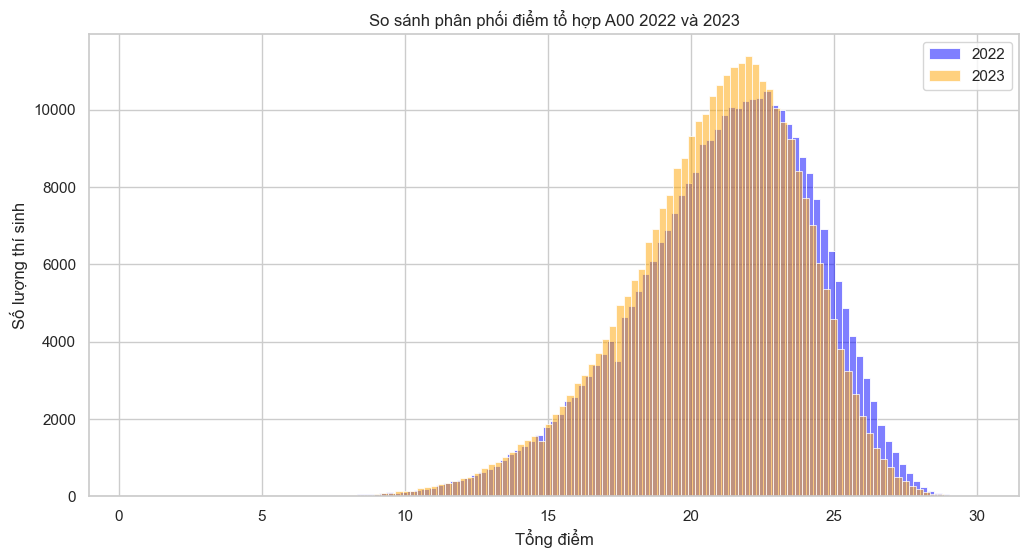

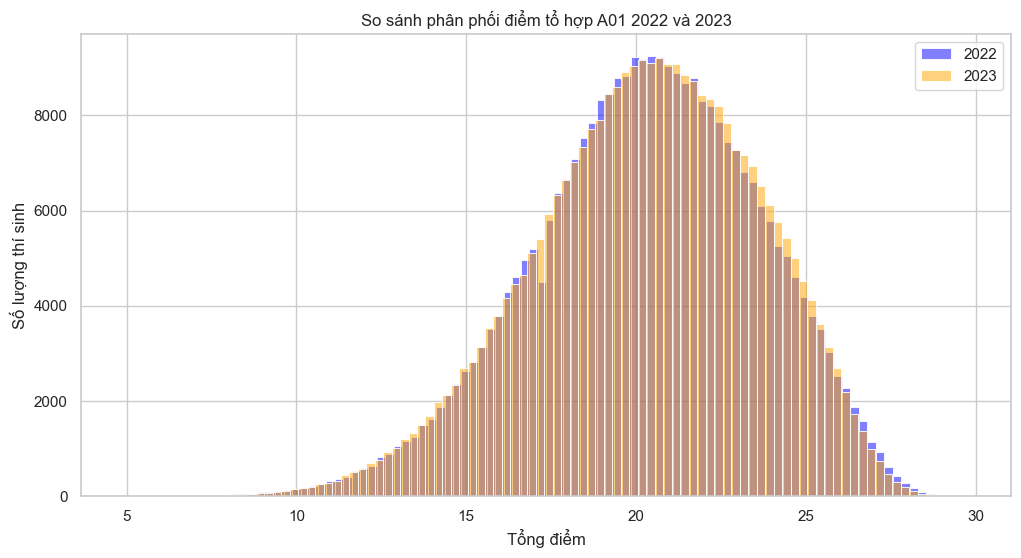

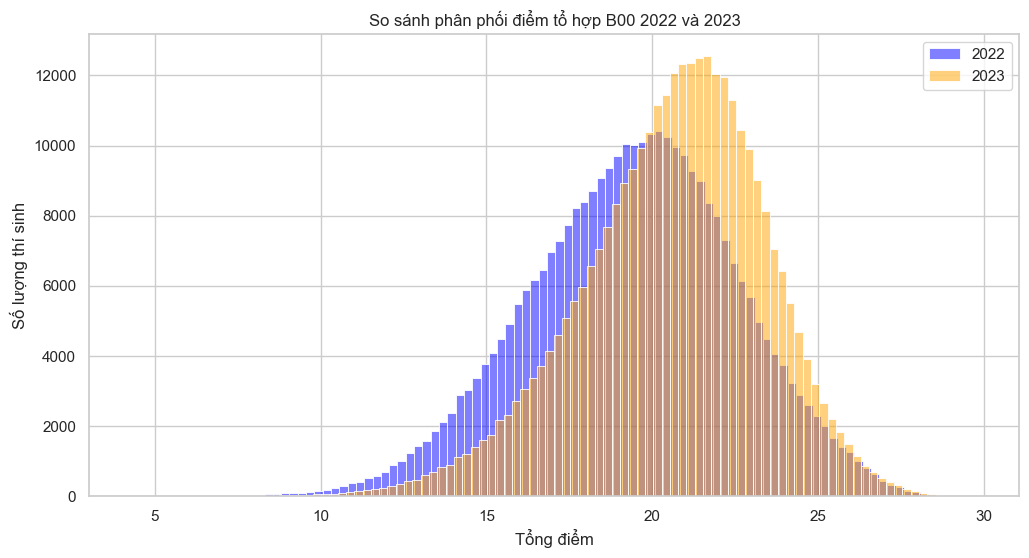

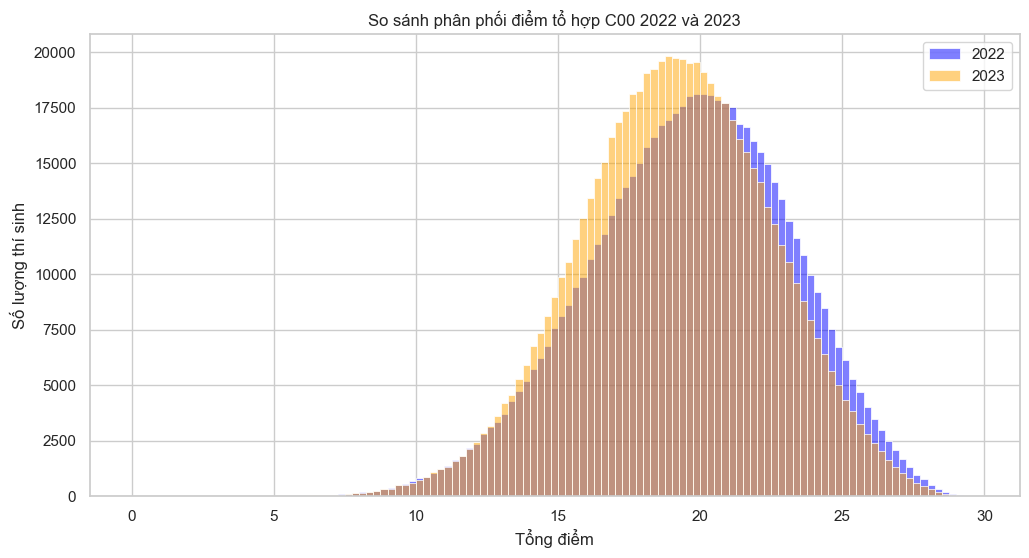

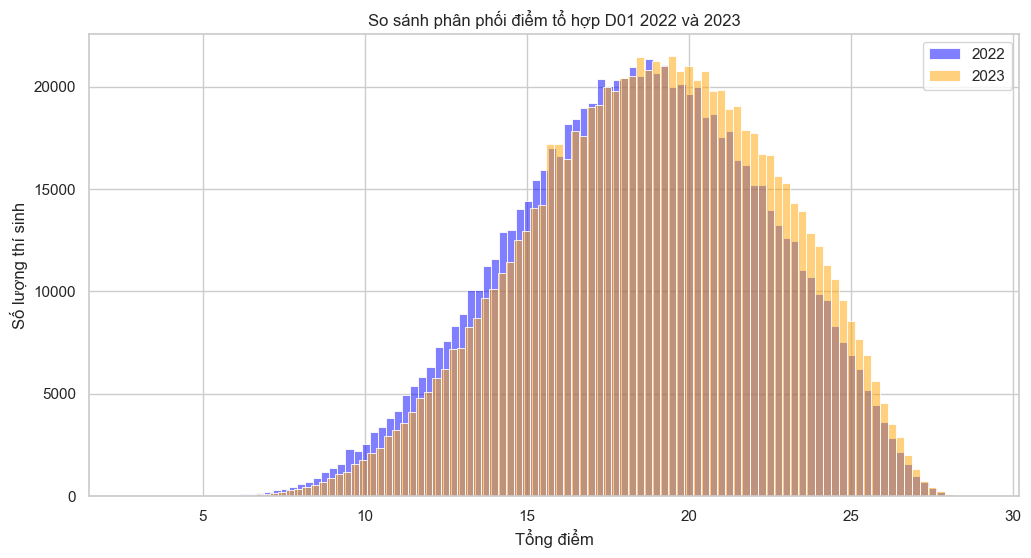

In [132]:
# Vẽ biểu đồ phân phối điểm cho từng tổ hợp môn
sns.set_theme(style="whitegrid")
for combo in combinations.keys():
    plt.figure(figsize=(12, 6))
    sns.histplot(df_2022[combo], color='blue', label='2022', stat="count", alpha=0.5, binwidth=0.25)
    sns.histplot(df_2023[combo], color='orange', label='2023', stat="count", alpha=0.5, binwidth=0.25)
    plt.title(f'So sánh phân phối điểm tổ hợp {combo} 2022 và 2023')
    plt.xlabel('Tổng điểm')
    plt.ylabel('Số lượng thí sinh')
    plt.legend()
    plt.savefig(f'{path_img}/distribution_{combo}.png')
    plt.show()

### Lưu lại dữ liệu ban đầu

In [103]:
df_2022.to_csv(path_processed + '/2022_processed.csv', index=False)
df_2023.to_csv(path_processed + '/2023_processed.csv', index=False)

### Phân tích tương quan giữa các môn thi

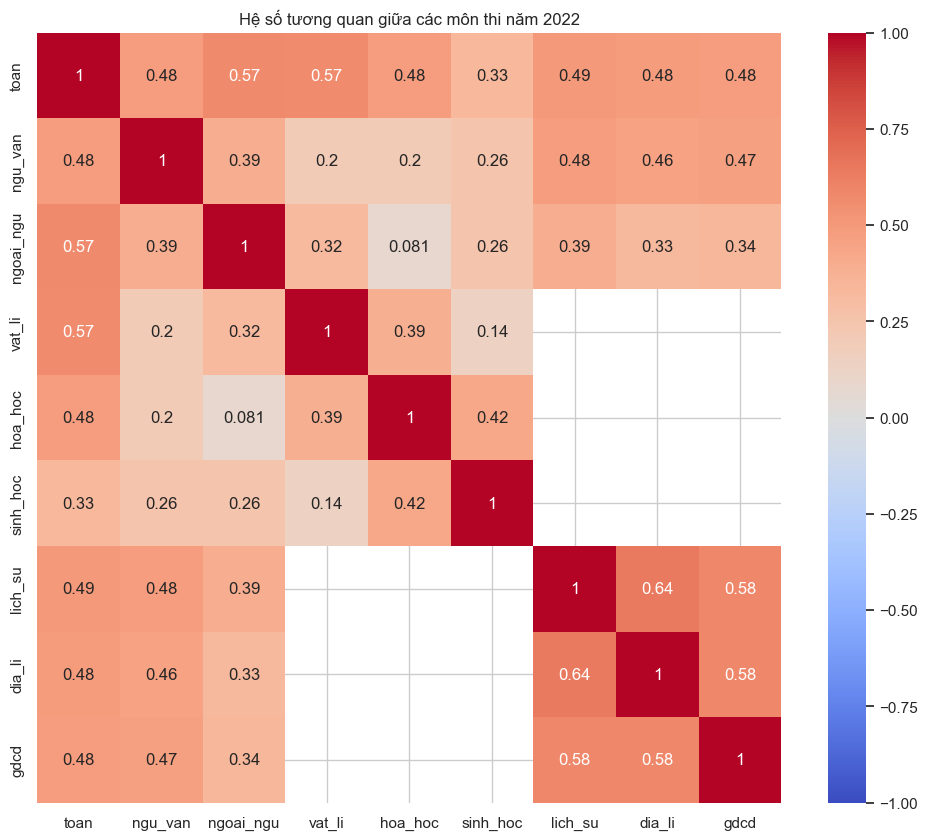

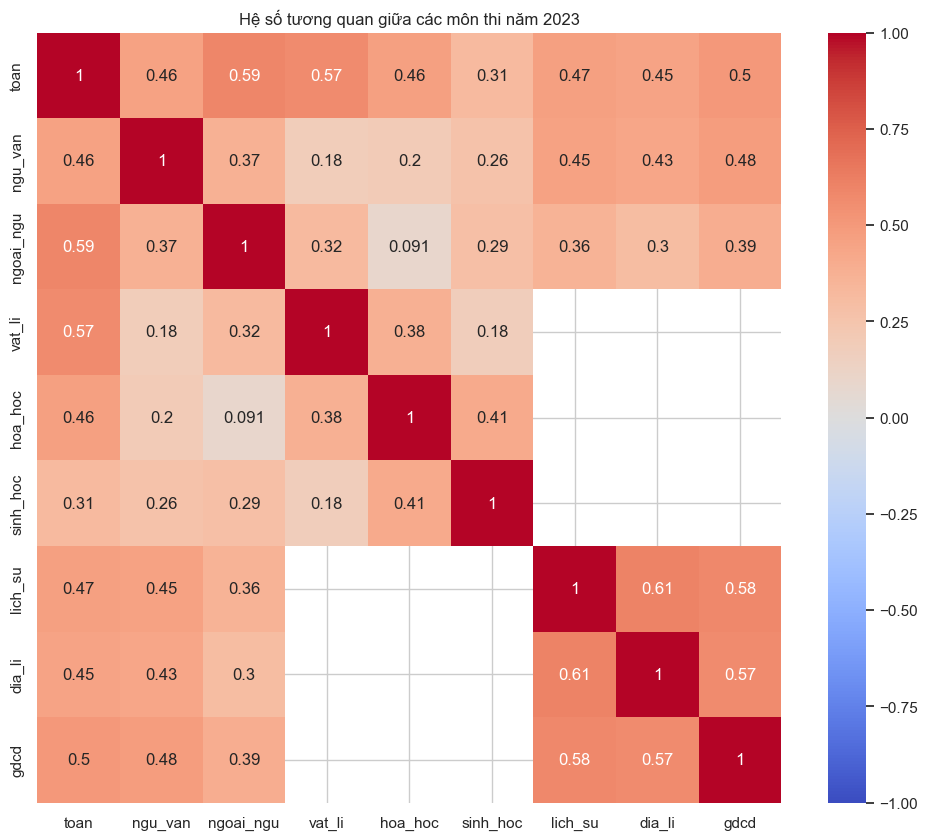

In [112]:
selected_columns = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']

corr_2022 = df_2022[selected_columns].corr()
corr_2023 = df_2023[selected_columns].corr()

# Vẽ biểu đồ heatmap cho hệ số tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(corr_2022, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Hệ số tương quan giữa các môn thi năm 2022')
plt.savefig('correlation_heatmap_2022.png')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_2023, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Hệ số tương quan giữa các môn thi năm 2023')
plt.savefig(path_img + '/correlation_heatmap_2023.png')
plt.show()

### So sánh phân phối điểm theo các nhóm (cao, trung bình, thấp)

In [126]:
def categorize_scores(df):
    subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
    for subject in subjects:
        df[f'{subject}_group'] = pd.qcut(df[subject], 3, labels=['Thấp', 'Trung bình', 'Cao'])
    return df

df_2022 = categorize_scores(df_2022)
df_2023 = categorize_scores(df_2023)

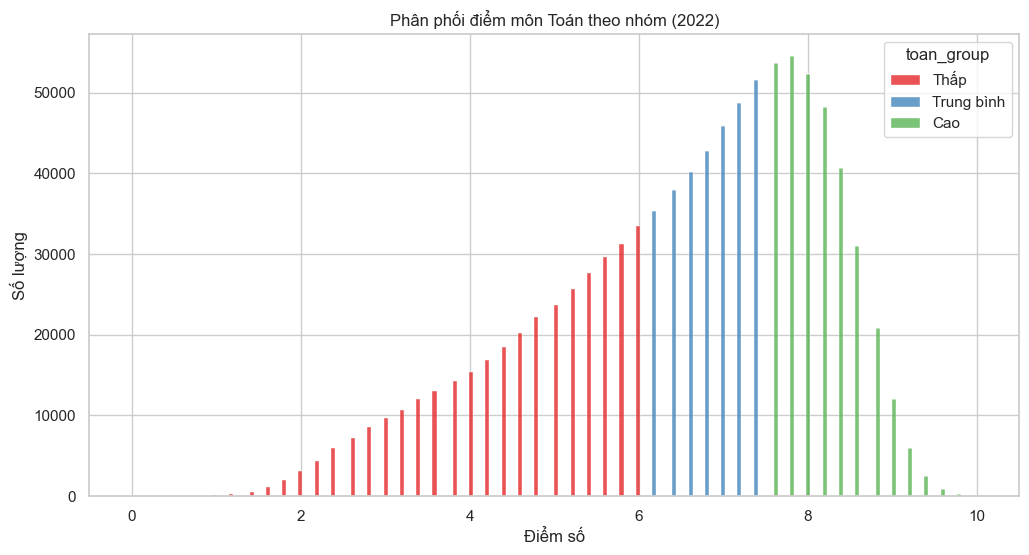

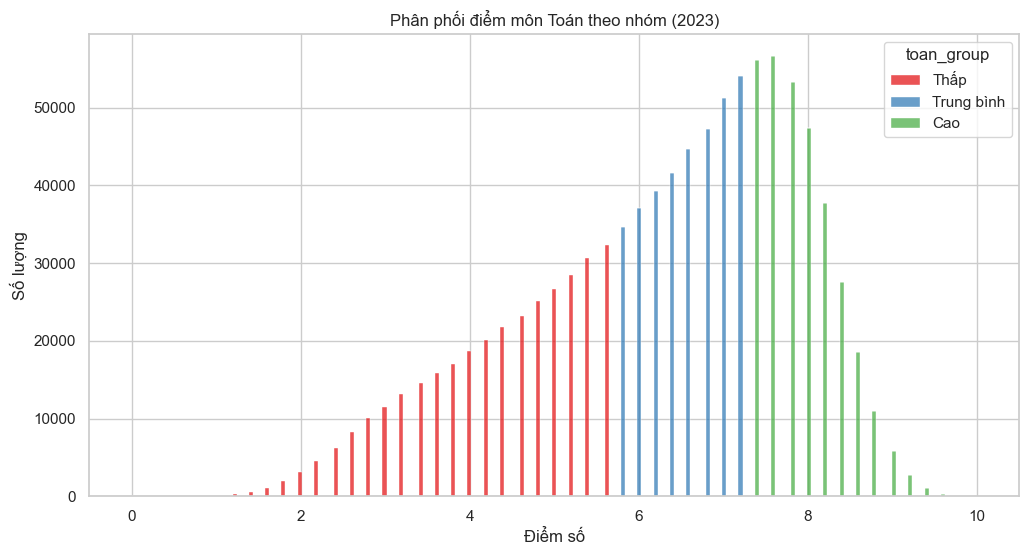

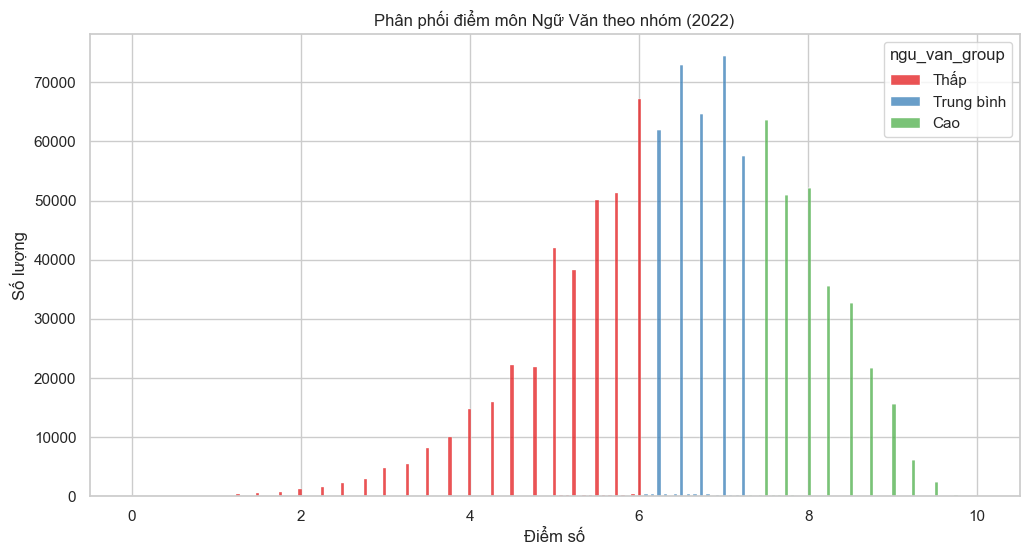

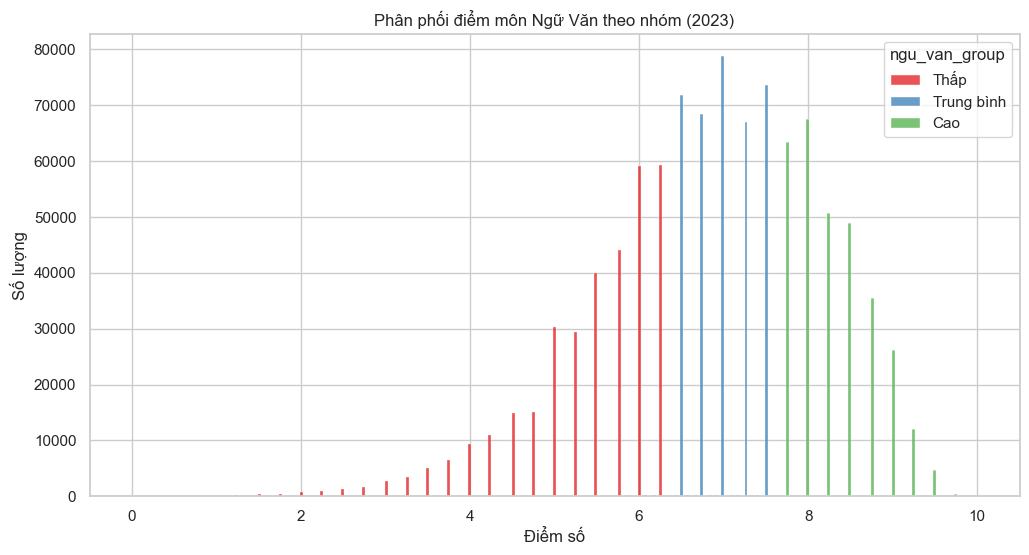

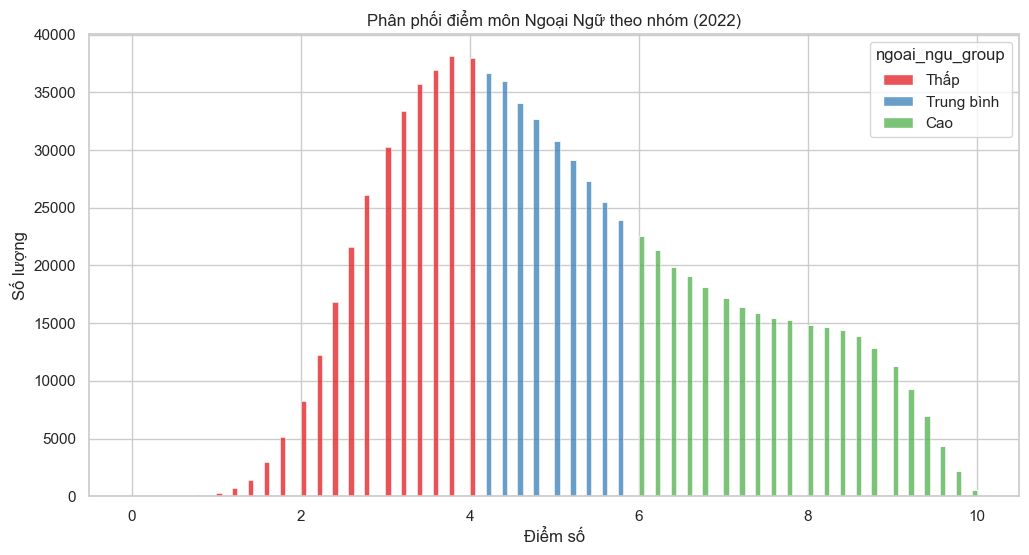

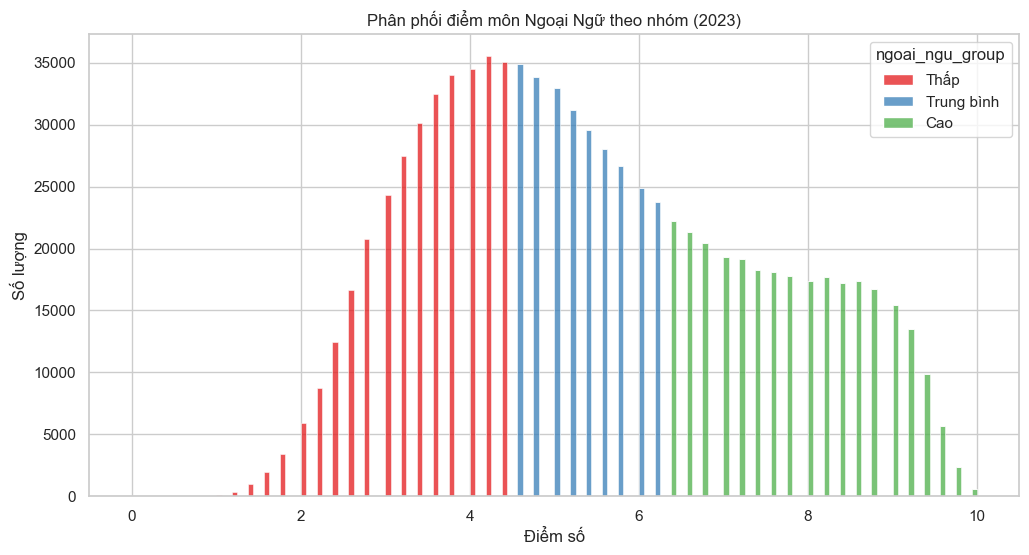

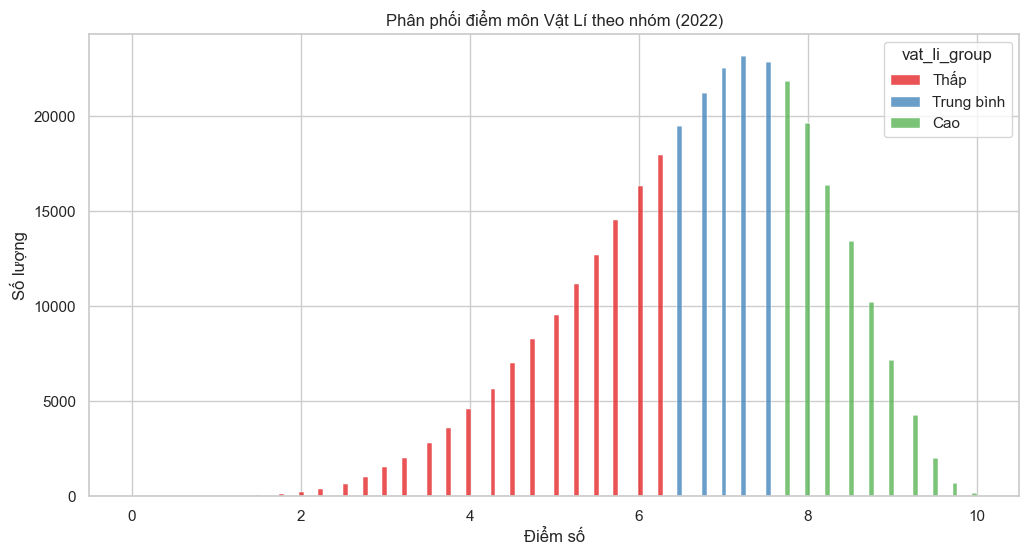

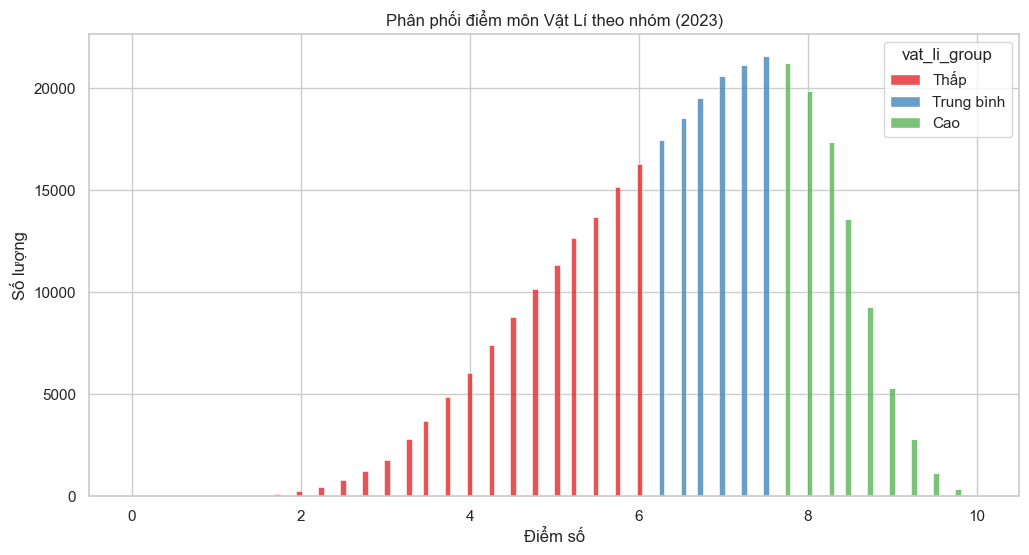

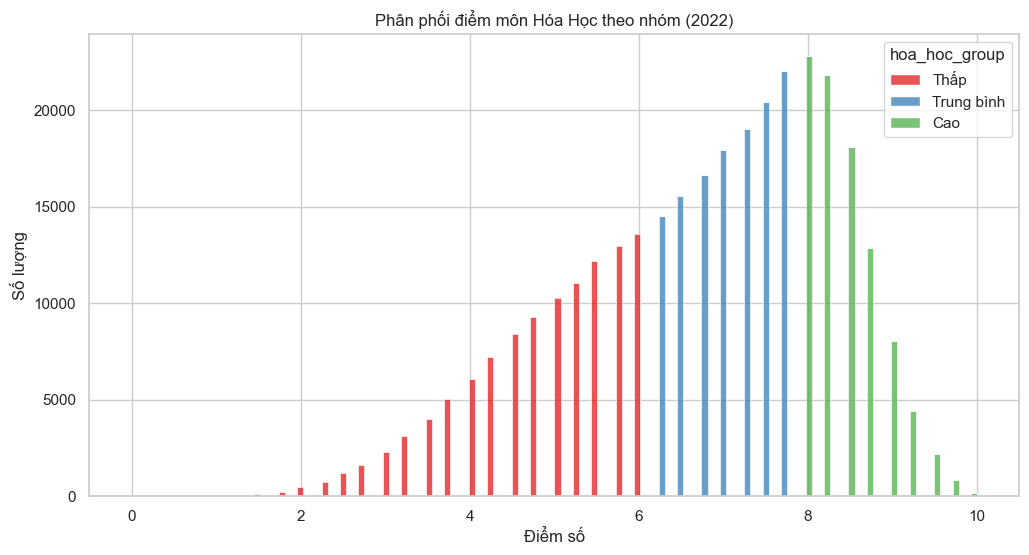

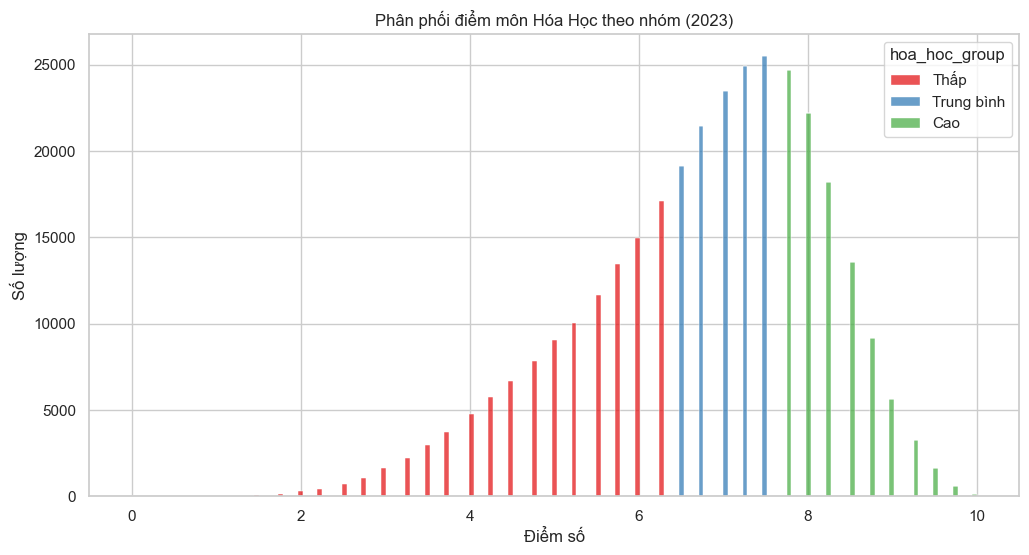

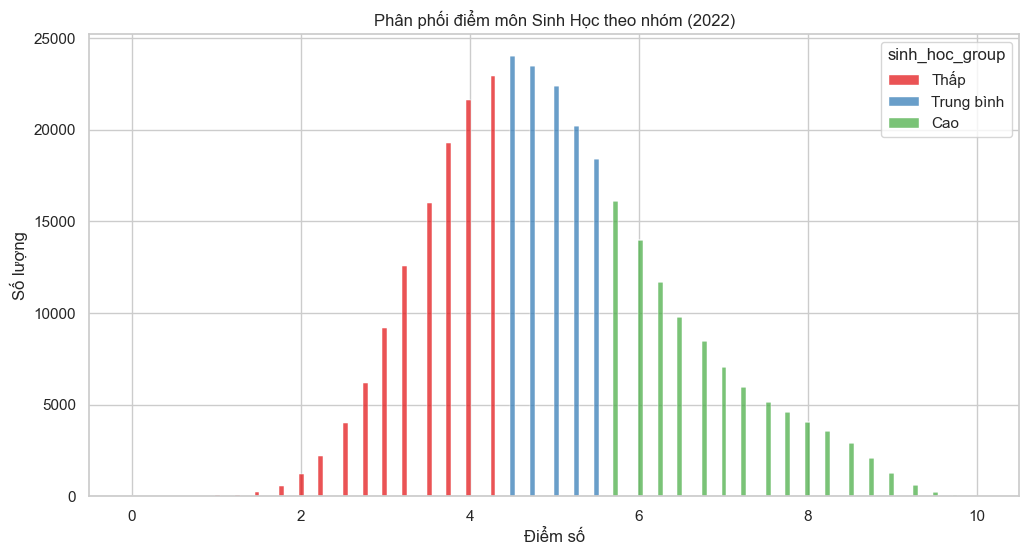

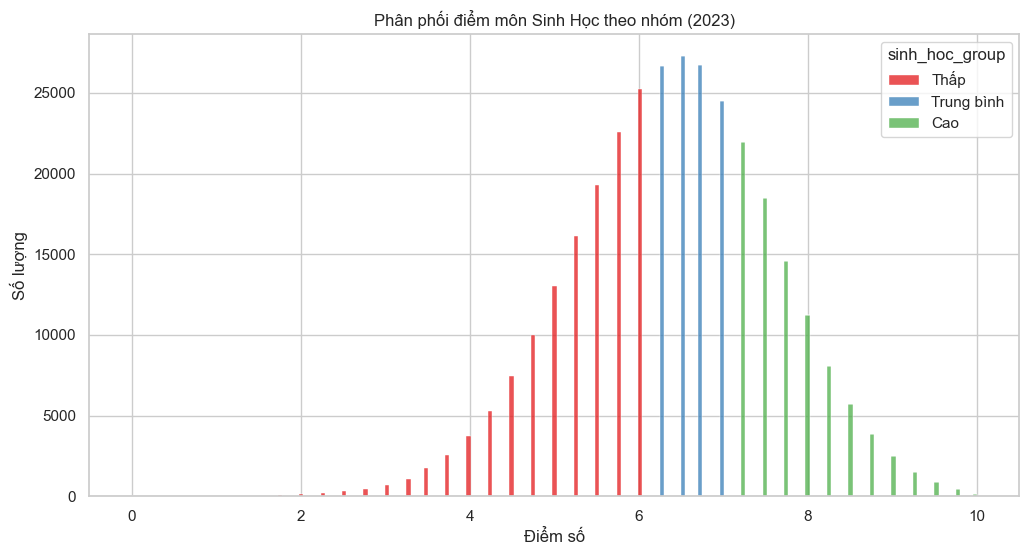

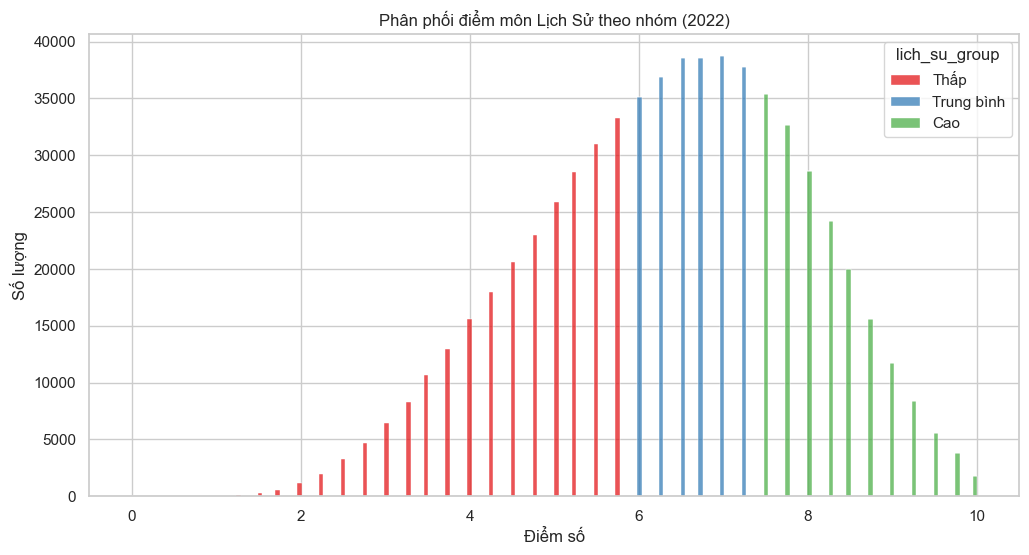

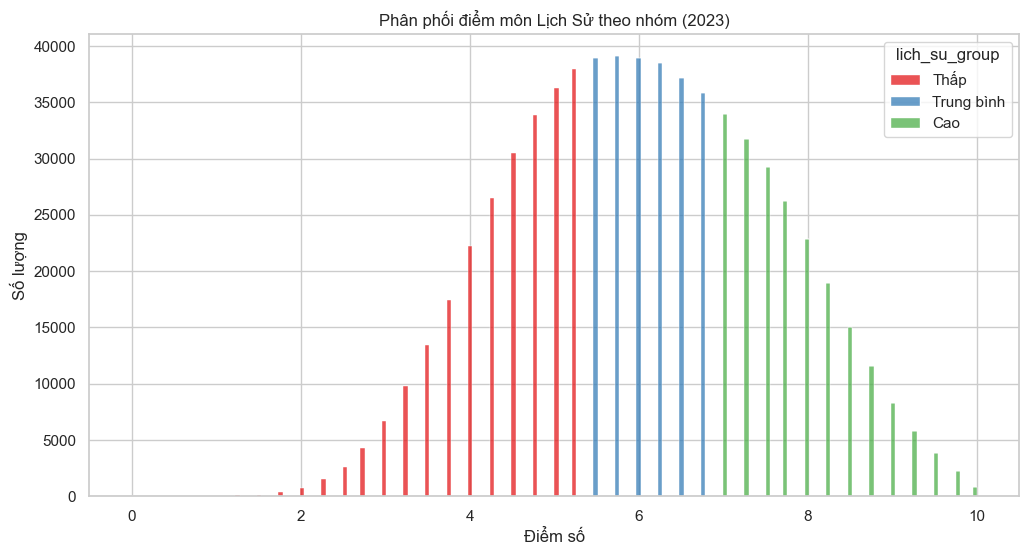

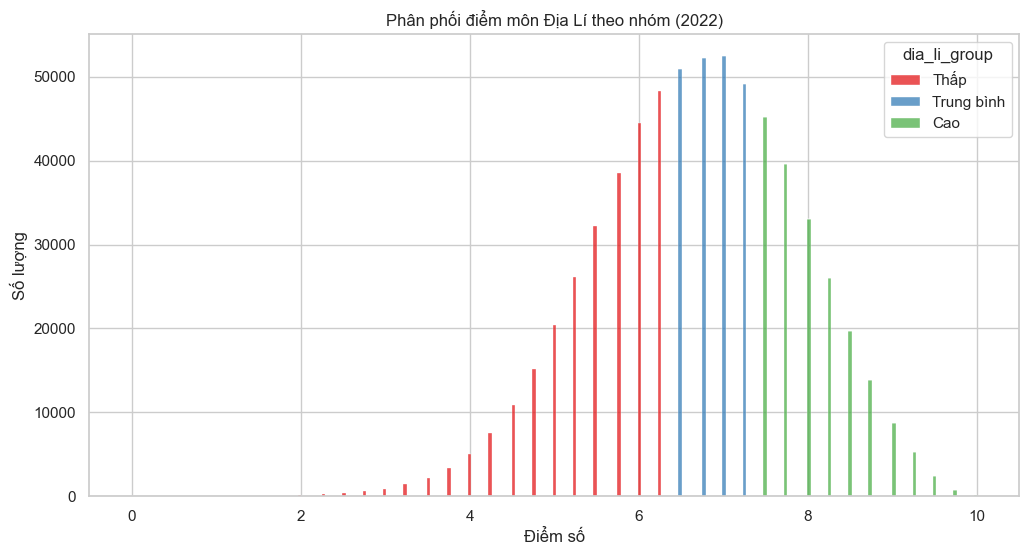

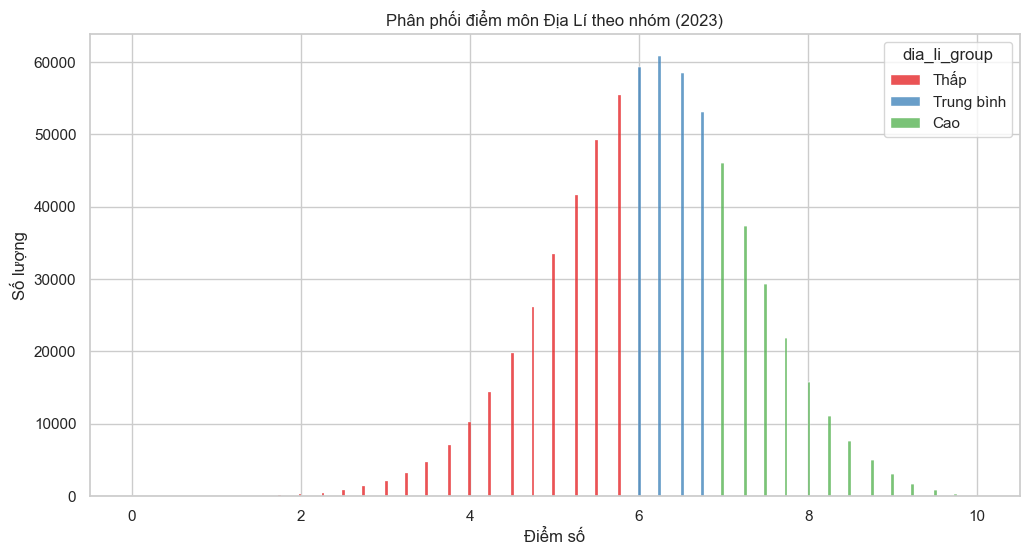

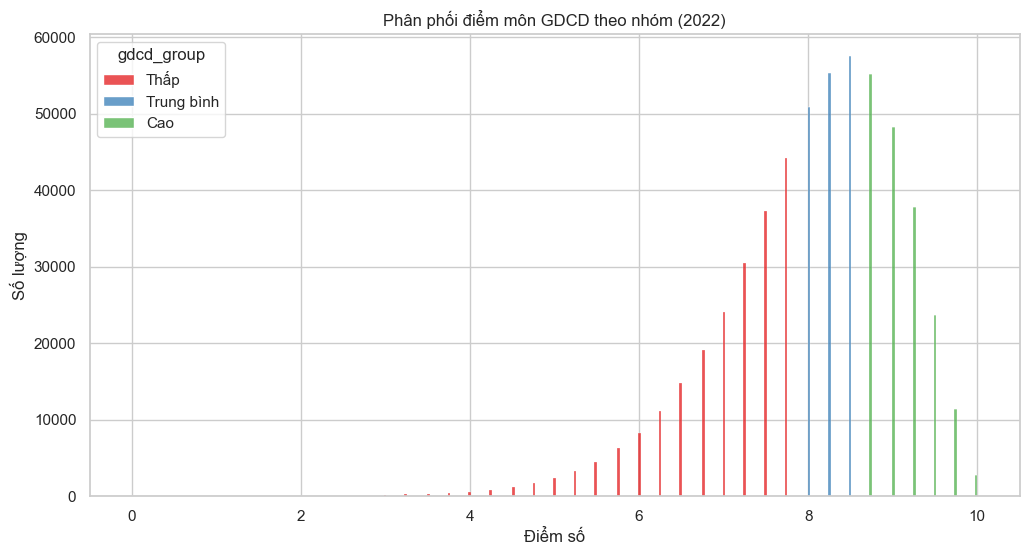

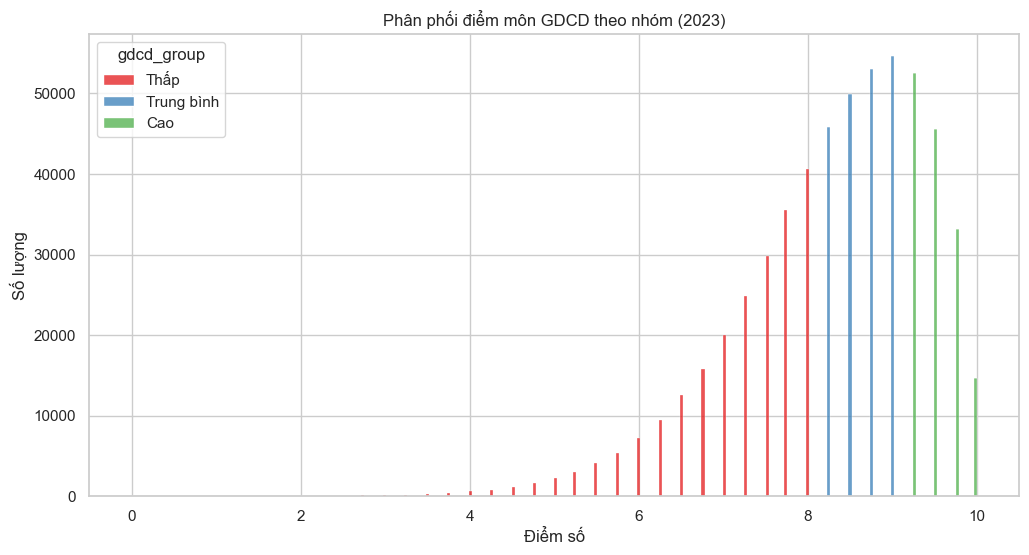

In [127]:
# Vẽ biểu đồ phân phối điểm theo các nhóm
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']

for subject in subjects:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_2022, x=subject, hue=f'{subject}_group', multiple="stack", palette='Set1')
    plt.title(f'Phân phối điểm môn {subject_map[subject]} theo nhóm (2022)')
    plt.xlabel('Điểm số')
    plt.ylabel('Số lượng')
    plt.savefig(f'{path_img}/grouped_distribution_{subject}_2022.png')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(df_2023, x=subject, hue=f'{subject}_group', multiple="stack", palette='Set1')
    plt.title(f'Phân phối điểm môn {subject_map[subject]} theo nhóm (2023)')
    plt.xlabel('Điểm số')
    plt.ylabel('Số lượng')
    plt.savefig(f'{path_img}/grouped_distribution_{subject}_2023.png')
    plt.show()

### So sánh phân phối điểm tổ hợp môn theo các nhóm (cao, trung bình, thấp)

In [129]:
def categorize_scores_combo(df):
    combos = ['A00', 'A01', 'B00', 'C00', 'D01']
    for combo in combos:
        df[f'{combo}_group'] = pd.qcut(df[combo], 3, labels=['Thấp', 'Trung bình', 'Cao'])
    return df

df_2022 = categorize_scores_combo(df_2022)
df_2023 = categorize_scores_combo(df_2023)

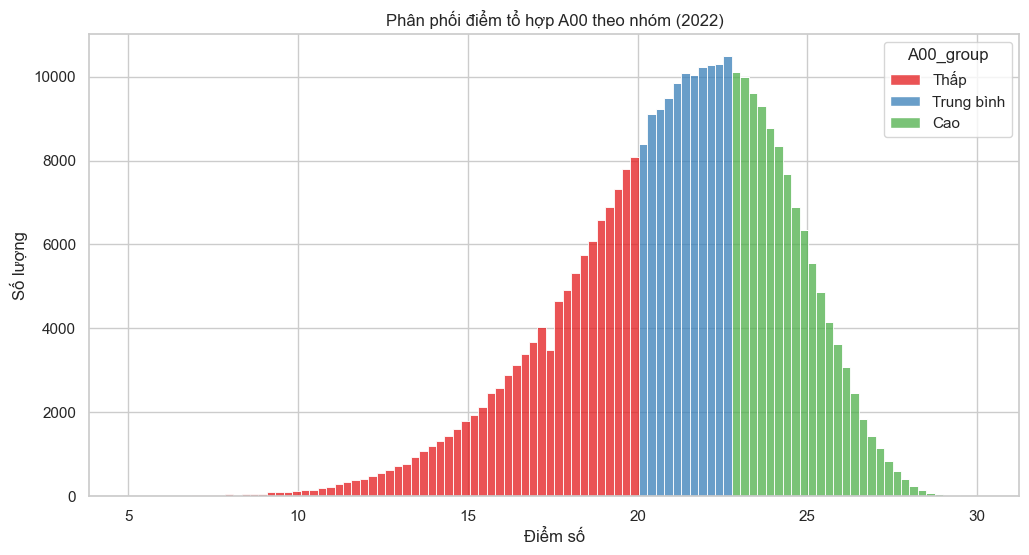

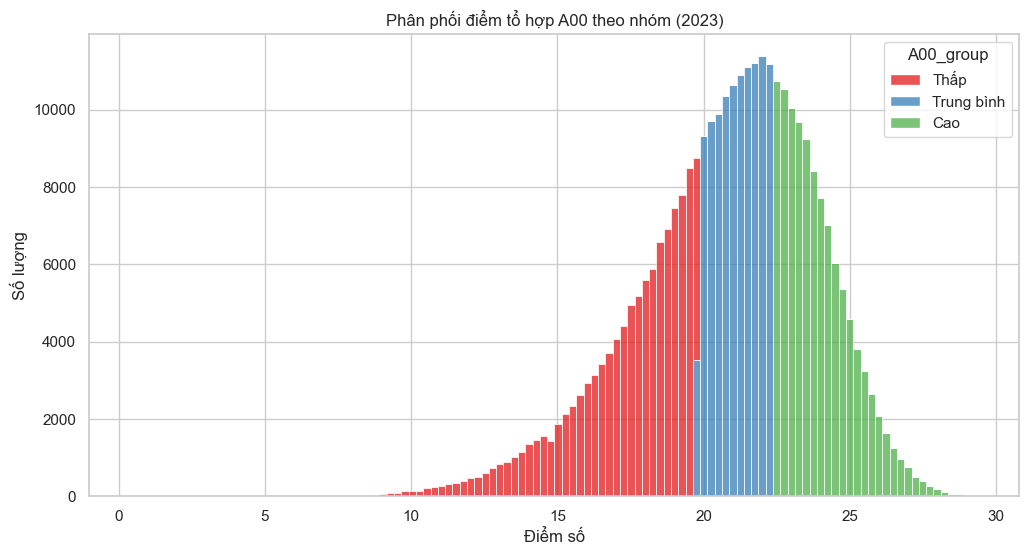

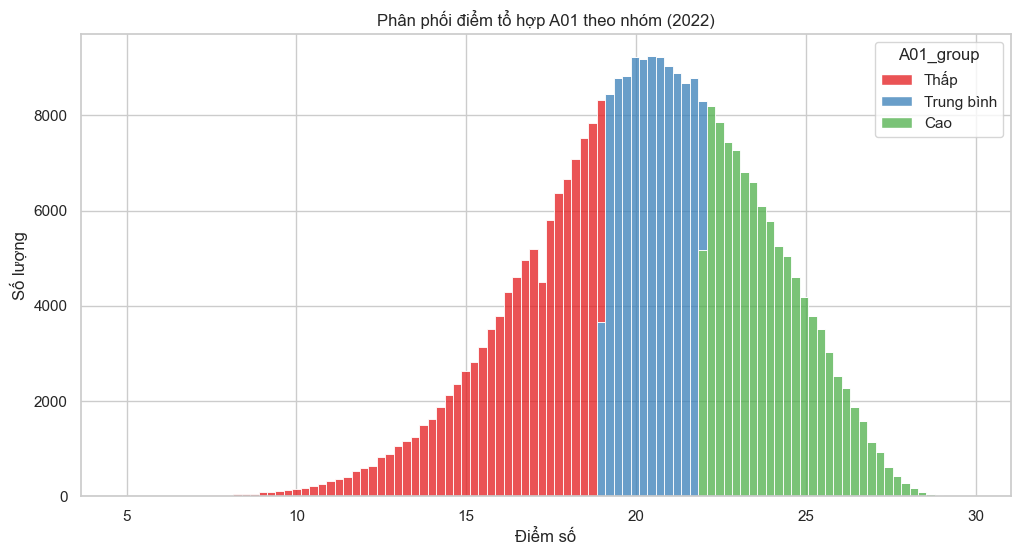

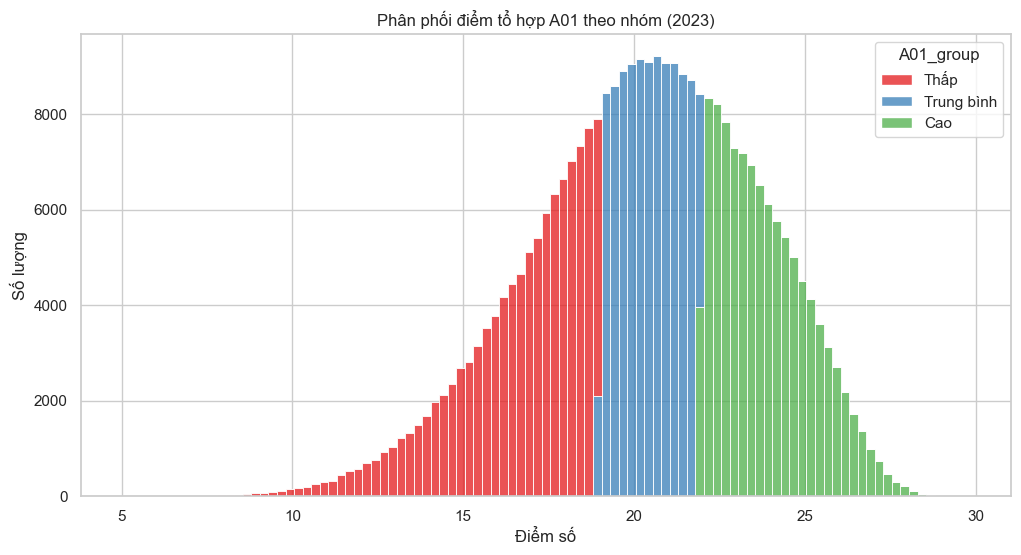

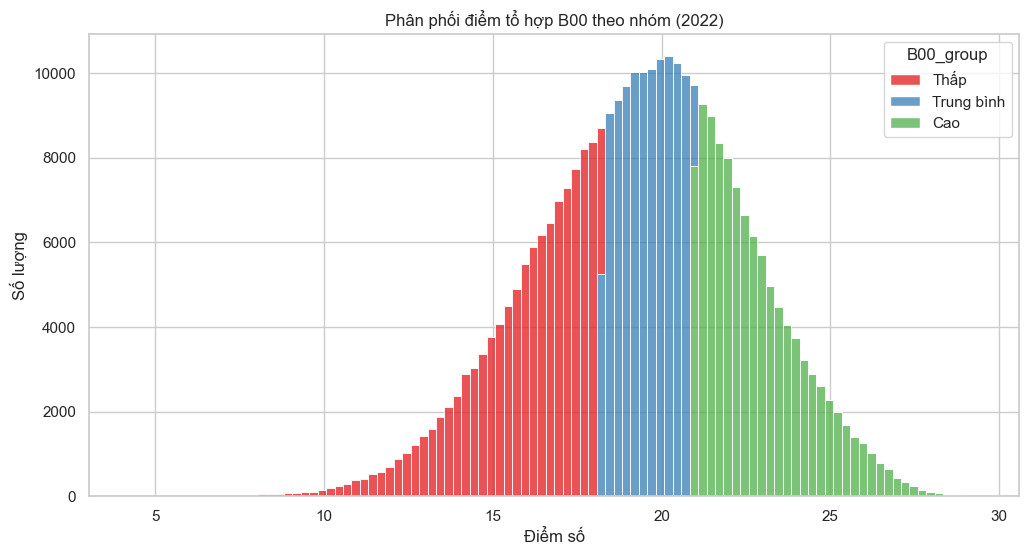

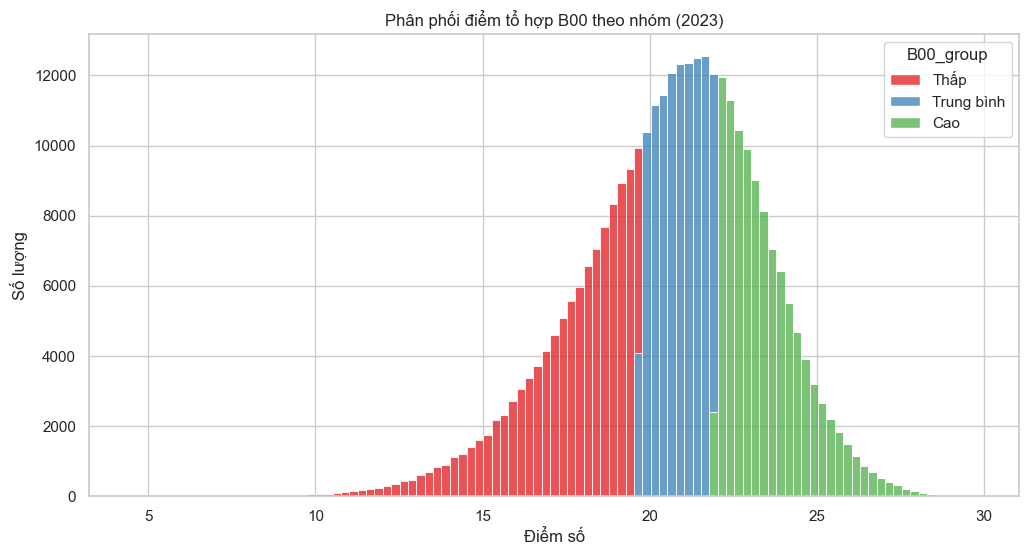

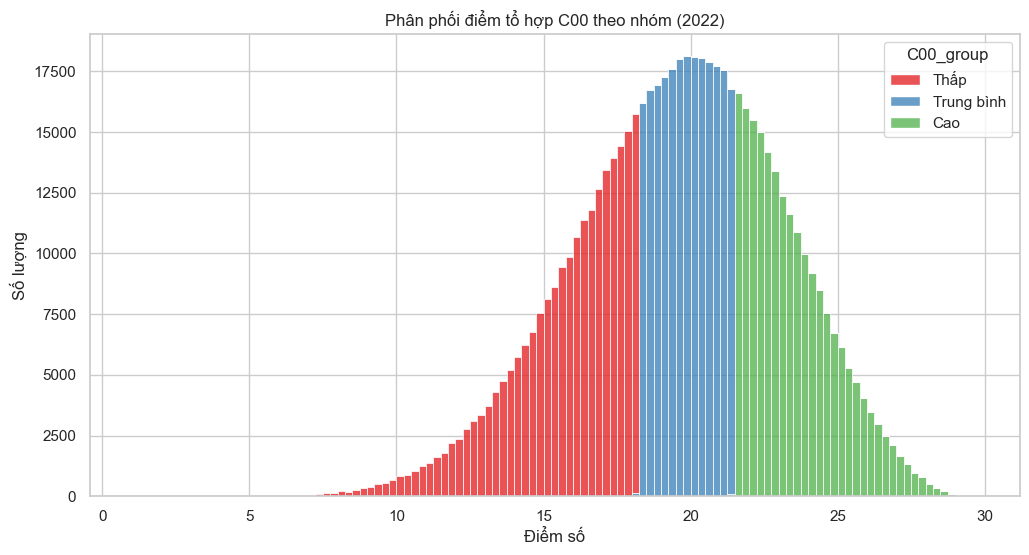

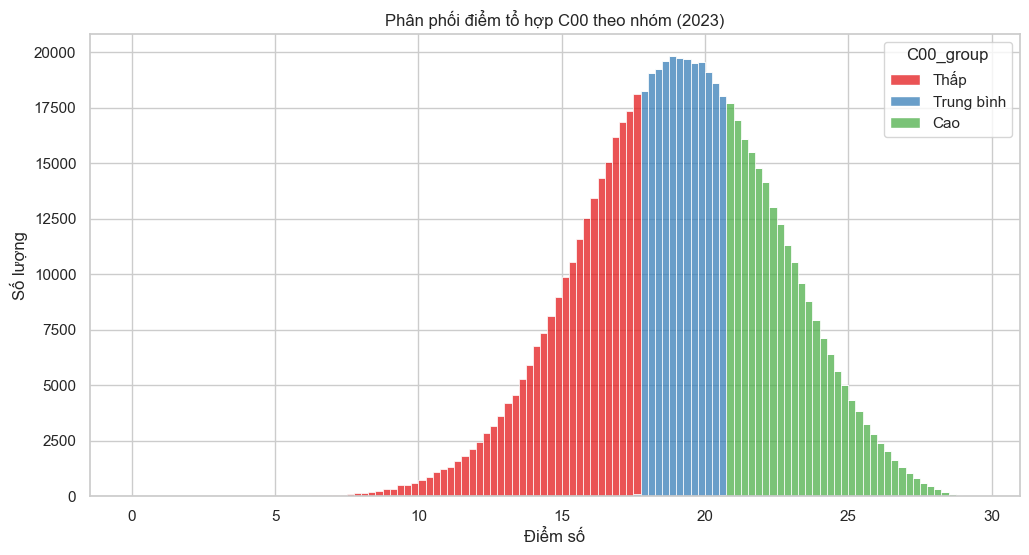

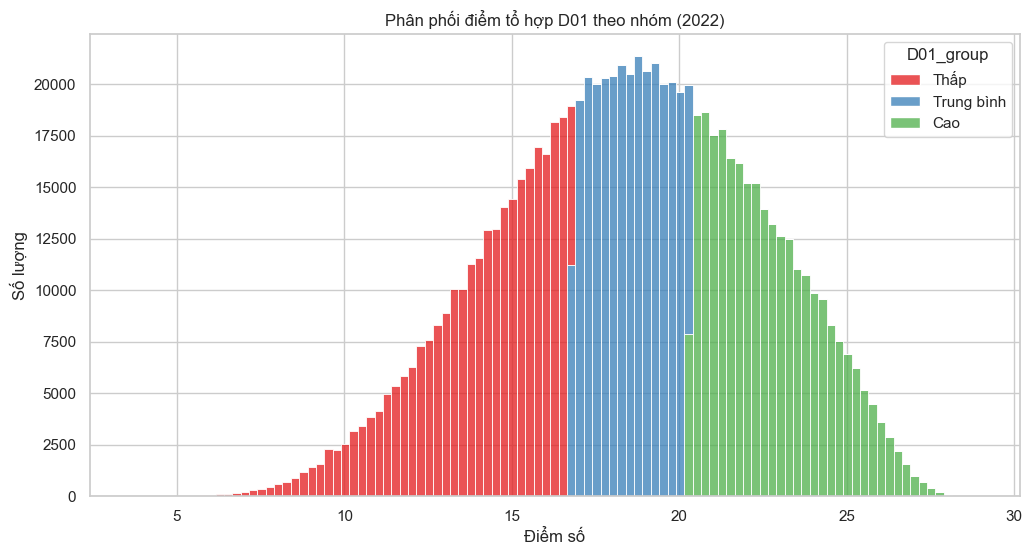

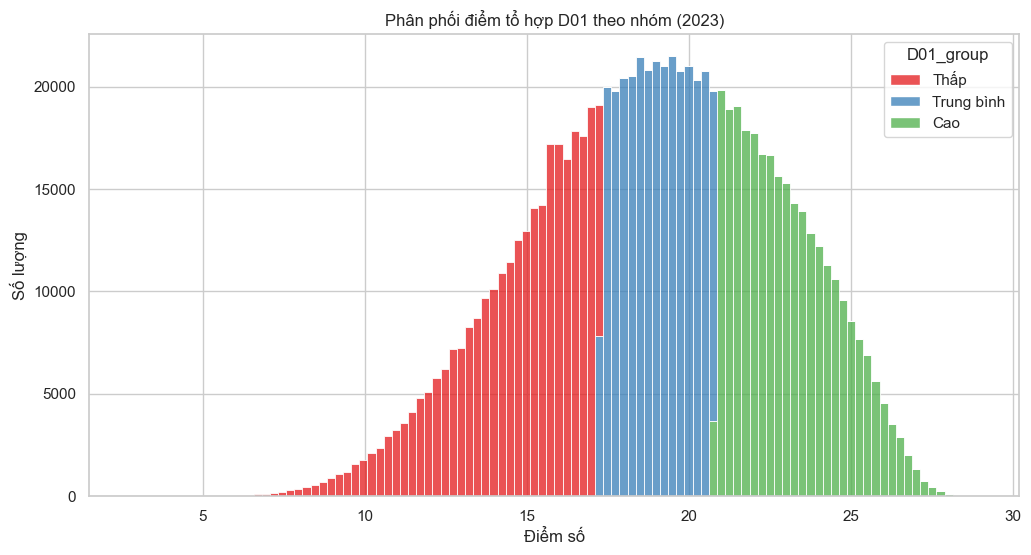

In [131]:
# Vẽ biểu đồ phân phối điểm theo các nhóm
combos = ['A00', 'A01', 'B00', 'C00', 'D01']

for combo in combos:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_2022, x=combo, hue=f'{combo}_group', multiple="stack", palette='Set1', binwidth=0.25)
    plt.title(f'Phân phối điểm tổ hợp {combo} theo nhóm (2022)')
    plt.xlabel('Điểm số')
    plt.ylabel('Số lượng')
    plt.savefig(f'{path_img}/grouped_distribution_{combo}_2022.png')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(df_2023, x=combo, hue=f'{combo}_group', multiple="stack", palette='Set1', binwidth=0.25)
    plt.title(f'Phân phối điểm tổ hợp {combo} theo nhóm (2023)')
    plt.xlabel('Điểm số')
    plt.ylabel('Số lượng')
    plt.savefig(f'{path_img}/grouped_distribution_{combo}_2023.png')
    plt.show()